<a href="https://colab.research.google.com/github/PaletteofDesign/kmeans/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
f = '/content/cust_seg.csv'
df = pd.read_csv(f)
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
df.rename(columns={'Customer Id': 'Customer_ID', 'Years Employed': 'Years_Employed', 
                   'Card Debt': 'Card_Debt', 'Other Debt': 'Other_Debt', 
                   'DebtIncomeRatio': 'Debt_Income_Ratio'},inplace=True)
df.head()

,Unnamed: 0,Customer_ID,Age,Edu,Years_Employed,Income,Card_Debt,Other_Debt,Defaulted,Debt_Income_Ratio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [5]:
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,Customer_ID,Age,Edu,Years_Employed,Income,Card_Debt,Other_Debt,Defaulted,Debt_Income_Ratio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [6]:
df.set_index('Customer_ID',inplace=True)

In [7]:
df.describe()

,Age,Edu,Years_Employed,Income,Card_Debt,Other_Debt,Defaulted,Debt_Income_Ratio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [8]:
df.nunique()

Age                   37
Edu                    5
Years_Employed        33
Income               129
Card_Debt            727
Other_Debt           788
Defaulted              2
Debt_Income_Ratio    245
dtype: int64

In [9]:
df.isnull().sum()

Age                    0
Edu                    0
Years_Employed         0
Income                 0
Card_Debt              0
Other_Debt             0
Defaulted            150
Debt_Income_Ratio      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                850 non-null    int64  
 1   Edu                850 non-null    int64  
 2   Years_Employed     850 non-null    int64  
 3   Income             850 non-null    int64  
 4   Card_Debt          850 non-null    float64
 5   Other_Debt         850 non-null    float64
 6   Defaulted          700 non-null    float64
 7   Debt_Income_Ratio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 59.8 KB


In [11]:
zero = df['Defaulted']==0
df[zero].head()

,Age,Edu,Years_Employed,Income,Card_Debt,Other_Debt,Defaulted,Debt_Income_Ratio
Customer_ID,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2
7,38,2,4,56,0.442,0.454,0.0,1.6


In [12]:
df.dropna(inplace=True)

In [13]:
df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [19]:
df.isna().sum()

Age                  0
Edu                  0
Years_Employed       0
Income               0
Card_Debt            0
Other_Debt           0
Defaulted            0
Debt_Income_Ratio    0
dtype: int64

In [14]:
df.shape

(700, 8)

In [15]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

We will use customer age, education years of employment, income, debt, whether they defaulted, and debt: income ratio to group them into segments.

In [20]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
df['cluster'] = kmeans.labels_

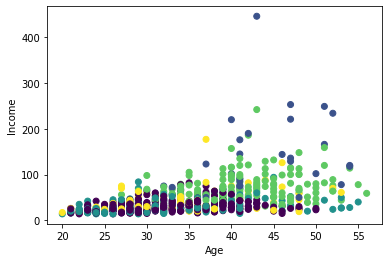

In [24]:
plt.scatter(df['Age'], df['Income'], c=df['cluster'])
plt.xlabel('Age')
plt.ylabel('Income');

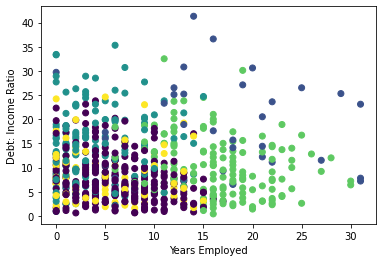

In [26]:
plt.scatter(df['Years_Employed'], df['Debt_Income_Ratio'], c = df['cluster'])
plt.xlabel('Years Employed')
plt.ylabel('Debt: Income Ratio');

In [27]:
df['cluster'].value_counts()

0    286
3    152
2    150
4     80
1     32
Name: cluster, dtype: int64

In [28]:
seg1 = df[df['cluster'] == 0]
seg2 = df[df['cluster'] == 1]
seg3 = df[df['cluster'] == 2]
seg4 = df[df['cluster'] == 3]
seg5 = df[df['cluster'] == 4]

In [29]:
cust_segs = [seg1, seg2, seg3, seg4, seg5]
for segment in cust_segs:
  print(segment.describe().T)

                   count       mean        std  ...      50%       75%     max
Age                286.0  32.272727   6.272951  ...  31.0000  37.00000  50.000
Edu                286.0   1.311189   0.463791  ...   1.0000   2.00000   2.000
Years_Employed     286.0   6.342657   3.951646  ...   6.0000   9.00000  17.000
Income             286.0  30.377622  11.857223  ...  27.5000  36.00000  82.000
Card_Debt          286.0   0.665157   0.627726  ...   0.4515   0.88175   3.703
Other_Debt         286.0   1.518906   0.996498  ...   1.2825   2.07075   5.960
Defaulted          286.0   0.000000   0.000000  ...   0.0000   0.00000   0.000
Debt_Income_Ratio  286.0   7.643706   4.792964  ...   6.6500  10.10000  23.800
cluster            286.0   0.000000   0.000000  ...   0.0000   0.00000   0.000

[9 rows x 8 columns]
                   count        mean        std  ...       50%        75%      max
Age                 32.0   43.125000   6.524149  ...   41.0000   47.25000   54.000
Edu                 32

In [31]:
age_means = [np.mean(segment['Age']) for segment in cust_segs]
income_means = [np.mean(segment['Income']) for segment in cust_segs]
debtincomeratio_means = [np.mean(segment['Debt_Income_Ratio']) for segment in cust_segs]

In [32]:
summary_df = pd.DataFrame({'Cust Segment': ['seg1', 'seg2', 'seg3', 'seg4', 'seg5'], 'Age Means': age_means, 
                           'Income Means': income_means, 'DebtIncomeRatio Means': debtincomeratio_means})

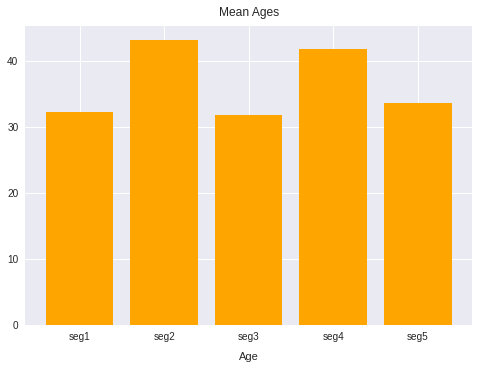

In [48]:
plt.style.use('seaborn')
plt.bar(summary_df['Cust Segment'], summary_df['Age Means'], color='orange')
plt.xlabel('Age', labelpad=10)
plt.title('Mean Ages', pad=10);

Seg 2 and 4 have the highest mean age. 

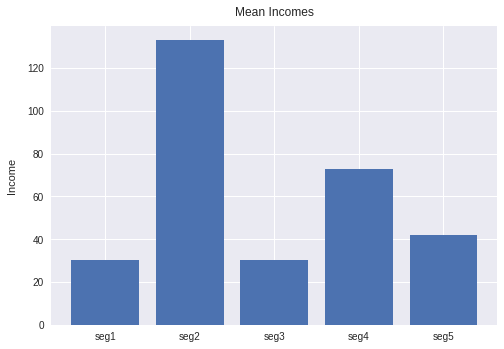

In [51]:
plt.style.use('seaborn')
plt.bar(summary_df['Cust Segment'], summary_df['Income Means'])
plt.ylabel('Income', labelpad=10)
plt.title('Mean Incomes', pad=10);

Seg 2 has the highest income compared to the rest of the segments.

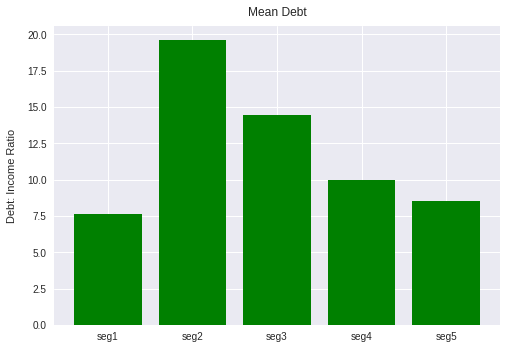

In [53]:
plt.style.use('seaborn')
plt.bar(summary_df['Cust Segment'], summary_df['DebtIncomeRatio Means'], color='green')
plt.ylabel('Debt: Income Ratio', labelpad=10)
plt.title('Mean Debt', pad=10);

Seg 1 and 4 have the lowest debt to income ratio. Seg 2 has the highst debt to income ratio.